# Imports

In [30]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("heart.csv")

# Explore Data

In [32]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [33]:
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [34]:
df.shape

(303, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

So there is NO Null values in this data

# Cleaning Data

In [38]:
df.duplicated().sum()

1

In [39]:
display(df.drop_duplicates(inplace=True)) 

None

In [40]:
df.duplicated().sum()

0

# Analysis and Visualization

In [41]:
df['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

There is 164 person have Heart disease and 
138 person Not

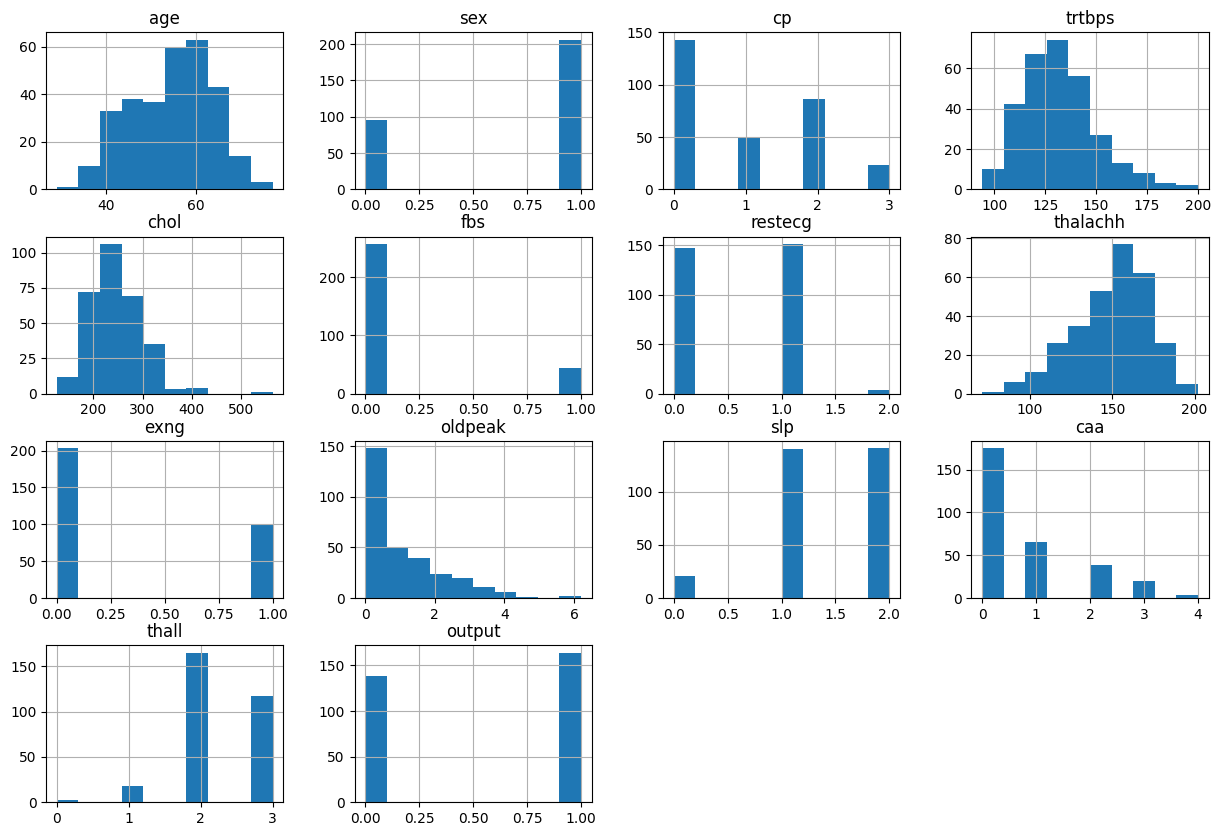

In [42]:
df.hist(figsize=(15,10))
plt.show()

<Axes: >

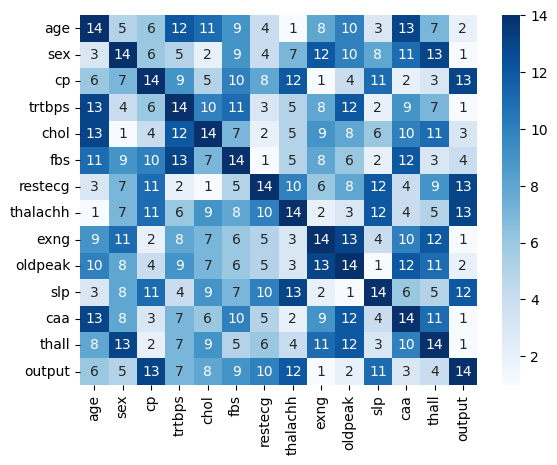

In [43]:
corr= df.corr()
sns.heatmap(corr.rank(axis='columns'),cmap='Blues',annot=True)

# Splitting Data

In [44]:
X = df.drop('output',axis='columns')
y= df['output']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
# Normalization and Standardization

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

**Decision Tree Classifier**

In [47]:
DT = DecisionTreeClassifier()
DT.fit(X_train_scaled,y_train)

y_prediction = DT.predict(X_test_scaled)
tree_train_acc = round(accuracy_score(y_train,DT.predict(X_train_scaled))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)

print("With normalization:")
print('Decision Tree Train Accuracy = ' , tree_train_acc,'%')
print('Decision tree Test Accuracy = ' , tree_test_acc,'%')
print()
print(classification_report(y_test,DT.predict(X_test_scaled), digits= 4))

With normalization:
Decision Tree Train Accuracy =  100.0 %
Decision tree Test Accuracy =  80.33 %

              precision    recall  f1-score   support

           0     0.7429    0.8966    0.8125        29
           1     0.8846    0.7188    0.7931        32

    accuracy                         0.8033        61
   macro avg     0.8137    0.8077    0.8028        61
weighted avg     0.8172    0.8033    0.8023        61



In [48]:
DT2 = DecisionTreeClassifier()
DT2.fit(X_train_scaled2,y_train)

y_prediction2 = DT2.predict(X_test_scaled2)
tree_train_acc2 = round(accuracy_score(y_train,DT2.predict(X_train_scaled2))*100,2)
tree_test_acc2 = round(accuracy_score(y_test,y_prediction2)*100,2)

print("With standardization:")
print('Decision Tree Train Accuracy = ' , tree_train_acc2,'%')
print('Decision tree Test Accuracy = ' , tree_test_acc2,'%')
print()
print(classification_report(y_test,DT2.predict(X_test_scaled2), digits= 4))

With standardization:
Decision Tree Train Accuracy =  100.0 %
Decision tree Test Accuracy =  75.41 %

              precision    recall  f1-score   support

           0     0.6944    0.8621    0.7692        29
           1     0.8400    0.6562    0.7368        32

    accuracy                         0.7541        61
   macro avg     0.7672    0.7592    0.7530        61
weighted avg     0.7708    0.7541    0.7522        61



**K-Nearest Neighbors Classifier**

In [49]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled,y_train)

y_prediction = KNN.predict(X_test_scaled)
tree_train_acc = round(accuracy_score(y_train,KNN.predict(X_train_scaled))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)

print("With normalization:")
print('KNN Train Accuracy = ' , tree_train_acc,'%')
print('KNN Test Accuracy = ' , tree_test_acc,'%')
print()
print(classification_report(y_test,KNN.predict(X_test_scaled), digits= 4))


With normalization:
KNN Train Accuracy =  84.65 %
KNN Test Accuracy =  85.25 %

              precision    recall  f1-score   support

           0     0.7941    0.9310    0.8571        29
           1     0.9259    0.7812    0.8475        32

    accuracy                         0.8525        61
   macro avg     0.8600    0.8561    0.8523        61
weighted avg     0.8633    0.8525    0.8521        61



In [50]:
KNN2 = KNeighborsClassifier()
KNN2.fit(X_train_scaled2,y_train)

y_prediction2 = KNN2.predict(X_test_scaled2)
tree_train_acc2 = round(accuracy_score(y_train,KNN2.predict(X_train_scaled2))*100,2)
tree_test_acc2 = round(accuracy_score(y_test,y_prediction2)*100,2)

print("With standardization:")
print('KNN Train Accuracy = ' , tree_train_acc2,'%')
print('KNN Test Accuracy = ' , tree_test_acc2,'%')
print()
print(classification_report(y_test,KNN2.predict(X_test_scaled2), digits= 4))

With standardization:
KNN Train Accuracy =  86.31 %
KNN Test Accuracy =  91.8 %

              precision    recall  f1-score   support

           0     0.8750    0.9655    0.9180        29
           1     0.9655    0.8750    0.9180        32

    accuracy                         0.9180        61
   macro avg     0.9203    0.9203    0.9180        61
weighted avg     0.9225    0.9180    0.9180        61



**Random Forest**

In [51]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)

y_prediction = RF.predict(X_test_scaled)
tree_train_acc = round(accuracy_score(y_train,RF.predict(X_train_scaled))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)

print("With normalization:")
print('Random Forest Train Accuracy = ' , tree_train_acc,'%')
print('Random Forest Test Accuracy = ' , tree_test_acc,'%')
print()
print(classification_report(y_test,RF.predict(X_test_scaled), digits= 4))

With normalization:
Random Forest Train Accuracy =  100.0 %
Random Forest Test Accuracy =  88.52 %

              precision    recall  f1-score   support

           0     0.8667    0.8966    0.8814        29
           1     0.9032    0.8750    0.8889        32

    accuracy                         0.8852        61
   macro avg     0.8849    0.8858    0.8851        61
weighted avg     0.8858    0.8852    0.8853        61



In [52]:
RF2 = RandomForestClassifier()
RF2.fit(X_train_scaled2,y_train)

y_prediction2 = RF2.predict(X_test_scaled2)
tree_train_acc2 = round(accuracy_score(y_train,RF2.predict(X_train_scaled2))*100,2)
tree_test_acc2 = round(accuracy_score(y_test,y_prediction2)*100,2)

print("With standardization:")
print('Random Forest Train Accuracy = ' , tree_train_acc2,'%')
print('Random Forest Test Accuracy = ' , tree_test_acc2,'%')
print()
print(classification_report(y_test,RF2.predict(X_test_scaled2), digits= 4))

With standardization:
Random Forest Train Accuracy =  100.0 %
Random Forest Test Accuracy =  85.25 %

              precision    recall  f1-score   support

           0     0.8125    0.8966    0.8525        29
           1     0.8966    0.8125    0.8525        32

    accuracy                         0.8525        61
   macro avg     0.8545    0.8545    0.8525        61
weighted avg     0.8566    0.8525    0.8525        61



**Logistic Regression**

In [53]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)

y_prediction = LR.predict(X_test_scaled)
tree_train_acc = round(accuracy_score(y_train,LR.predict(X_train_scaled))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)

print("With normalization:")
print('Logistic Regression Train Accuracy = ' , tree_train_acc,'%')
print('Logistic Regression Test Accuracy = ' , tree_test_acc,'%')
print()
print(classification_report(y_test,LR.predict(X_test_scaled), digits= 4))

With normalization:
Logistic Regression Train Accuracy =  85.48 %
Logistic Regression Test Accuracy =  83.61 %

              precision    recall  f1-score   support

           0     0.8276    0.8276    0.8276        29
           1     0.8438    0.8438    0.8438        32

    accuracy                         0.8361        61
   macro avg     0.8357    0.8357    0.8357        61
weighted avg     0.8361    0.8361    0.8361        61



In [54]:
LR2 = LogisticRegression()
LR2.fit(X_train_scaled2,y_train)

y_prediction2 = LR2.predict(X_test_scaled2)
tree_train_acc2 = round(accuracy_score(y_train,LR2.predict(X_train_scaled2))*100,2)
tree_test_acc2 = round(accuracy_score(y_test,y_prediction2)*100,2)

print("With standardization:")
print('Logistic Regression Train Accuracy = ' , tree_train_acc2,'%')
print('Logistic Regression Test Accuracy = ' , tree_test_acc2,'%')
print()
print(classification_report(y_test,LR2.predict(X_test_scaled2), digits= 4))

With standardization:
Logistic Regression Train Accuracy =  85.89 %
Logistic Regression Test Accuracy =  83.61 %

              precision    recall  f1-score   support

           0     0.8065    0.8621    0.8333        29
           1     0.8667    0.8125    0.8387        32

    accuracy                         0.8361        61
   macro avg     0.8366    0.8373    0.8360        61
weighted avg     0.8380    0.8361    0.8362        61



**Neural Network**

In [55]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=13, activation='relu'),   # Input layer
    tf.keras.layers.Dense(units=7, activation='relu'),   # Hidden layer
    tf.keras.layers.Dense(units=4, activation='relu'),   # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])
ann.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train_scaled, y_train, batch_size = 2, epochs = 150)

Epoch 1/150
121/121 [==============================] - 2s 3ms/step - loss: 0.6940 - accuracy: 0.4896
Epoch 2/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5851
Epoch 3/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.6183
Epoch 4/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5643
Epoch 5/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5643
Epoch 6/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5519
Epoch 7/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5726
Epoch 8/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.5934
Epoch 9/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.6266
Epoch 10/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6620 - accura

In [56]:
y_pre = ann.predict(X_test_scaled)
y_pred = (y_pre > 0.5)
cm = confusion_matrix(y_test, y_pred)

acc = round(accuracy_score(y_test,y_pred)*100,2)
print('With normalization:')
print('Neural Network Test Accuracy = ' , acc,'%')
print()
print('Confusion matrix:')
print(cm)
print(classification_report(y_test, y_pred, digits= 4))

2/2 [==============================] - 0s 4ms/step
With normalization:
Neural Network Test Accuracy =  88.52 %

Confusion matrix:
[[27  2]
 [ 5 27]]
              precision    recall  f1-score   support

           0     0.8438    0.9310    0.8852        29
           1     0.9310    0.8438    0.8852        32

    accuracy                         0.8852        61
   macro avg     0.8874    0.8874    0.8852        61
weighted avg     0.8895    0.8852    0.8852        61



In [60]:
ann2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=13, activation='relu'),   # Input layer
    tf.keras.layers.Dense(units=7, activation='relu'),   # Hidden layer
    tf.keras.layers.Dense(units=2, activation='relu'),   # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])
ann2.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann2.fit(X_train_scaled2, y_train, batch_size = 2, epochs = 150)

Epoch 1/150
121/121 [==============================] - 2s 3ms/step - loss: 0.6953 - accuracy: 0.5436
Epoch 2/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5477
Epoch 3/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5477
Epoch 4/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5477
Epoch 5/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5477
Epoch 6/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5477
Epoch 7/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5477
Epoch 8/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.5477
Epoch 9/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.5477
Epoch 10/150
121/121 [==============================] - 0s 3ms/step - loss: 0.6416 - accura

In [58]:
y_pre = ann2.predict(X_test_scaled2)
y_pred = (y_pre > 0.5)
cm = confusion_matrix(y_test, y_pred)

acc2 = round(accuracy_score(y_test,y_pred)*100,2)
print('With standardization:')
print('Neural Network Test Accuracy = ' , acc2,'%')
print()
print('Confusion matrix:')
print(cm)
print(classification_report(y_test, y_pred, digits= 4))

2/2 [==============================] - 0s 3ms/step
With standardization:
Neural Network Test Accuracy =  80.33 %

Confusion matrix:
[[23  6]
 [ 6 26]]
              precision    recall  f1-score   support

           0     0.7931    0.7931    0.7931        29
           1     0.8125    0.8125    0.8125        32

    accuracy                         0.8033        61
   macro avg     0.8028    0.8028    0.8028        61
weighted avg     0.8033    0.8033    0.8033        61



# Conclusion
The best one is the K-Nearest Classifier with accuracy 91.80% 